### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 4
### Due: Saturday, Feb 24th at 11.59pm CST
---

## Problem 1

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_1.npy`. This is a (10 x 2) numpy array, with voltage measurements in the first column and heteroscedastic voltage uncertainties in the second column. Compute the sample mean and the standard error on the sample mean for this data.

2) Fit the appropriate ln-likelihood function and find the best-fit mean voltage.

3) Compute and plot the Bayesian posterior probability density (*not the log posterior*) for the mean voltage assuming a uniform prior for the mean in the range 3 to 7. Make sure this posterior pdf is normalized!

4) By either drawing samples from this posterior, or using your gridded posterior pdf to make a cdf, find the equal-tailed 68.3% credible region for the mean, and compare the upper and lower boundaries to the sample mean plus/minus the standard error, respectively. *Also* find the MAP value of the mean.

5) Repeat (3) and (4) this time with a prior on the mean that is uniform in the range 4.6 to 5.4. 

6) Now, imagine that we read an old paper about the experiment that gave us the voltage measurements, and they found that the mean was actually $6\pm0.3$. Repeat (3) and (4) this time with a Gaussian prior on the mean centered at $6$ with standard deviation of $0.3$.

7) Plot all of the normalized posterior pdfs for $\mu$ from (3), (5), and (6) on the same plot, making sure that the xlim of the plot spans 0 to 10.

8) You have made sure that the posterior pdfs are properly normalized, but until now you have ignored the meaning of that normalization constant. It is the Bayesian evidence for the particular model you have applied! Compute the evidence under a new model where the prior for the mean is a delta function at the best-fit value you found in (1) *(think about this and don't just immediately go looking for a `scipy.stats` delta function)*. Compare this to the evidence found under the prior in (3). Taking ratios to make a Bayes factor, which model is favored? Is there much of an Occam penalty by having the wide prior compared to knowing the mean exactly? 

### Solution

Part 1

In [103]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from scipy import optimize

In [104]:
def load_data(file_path):
    """
    Load data from a numpy file.
    """
    return np.load(file_path)

def extract_measurements(data):
    """
    Extract voltage measurements and uncertainties from the data.
    """
    return data[:, 0], data[:, 1]

def calculate_sample_mean(measurements, uncertainties):
    """
    Calculate the sample mean using the heteroscedastic Gaussian result.
    """
    return np.sum(measurements / uncertainties**2) / np.sum(1 / uncertainties**2)

def calculate_error(uncertainties):
    """
    Calculate the error on the sample mean.
    """
    return np.sum(1 / uncertainties**2)**(-1/2)

# Load the data
data = load_data("../../homeworks/hw_data/hw4_data_1.npy")

# Extract the measurements and uncertainties
measurements, uncertainties = extract_measurements(data)

# Calculate the sample mean and error
sample_mean = calculate_sample_mean(measurements, uncertainties)
error = calculate_error(uncertainties)

print('Sample mean: ', sample_mean)
print('Error on sample mean: ', error)

Sample mean:  4.942118214425304
Error on sample mean:  0.43024334605205083


Part 2

In [105]:
# Define the squared loss function for a Gaussian distribution
# The ln-likelihood function for Gaussian distribution
def gaussian_squared_loss(mean, measurements, uncertainties):
    """
    Calculate the squared loss for a Gaussian distribution.
    The only model parameter is the mean value, a constant value.
    """
    return np.sum(((measurements - mean) / uncertainties) ** 2, -1) # data minus model, weighted by the noise

# Define a lambda function for the squared loss
squared_loss_function = lambda mean: gaussian_squared_loss(mean[0], measurements=meas, uncertainties=uncert)

# Define the initial guess for the mean
Initial_guess = 5

# Compute the maximum likelihood 
# scipy optimize finds the function minimum
best_fit_mean = optimize.fmin(squared_loss_function, Initial_guess, disp=False)

print('Best fit mean voltage: ', best_fit_mean[0])

Best fit mean voltage:  4.942138671875


Part 3

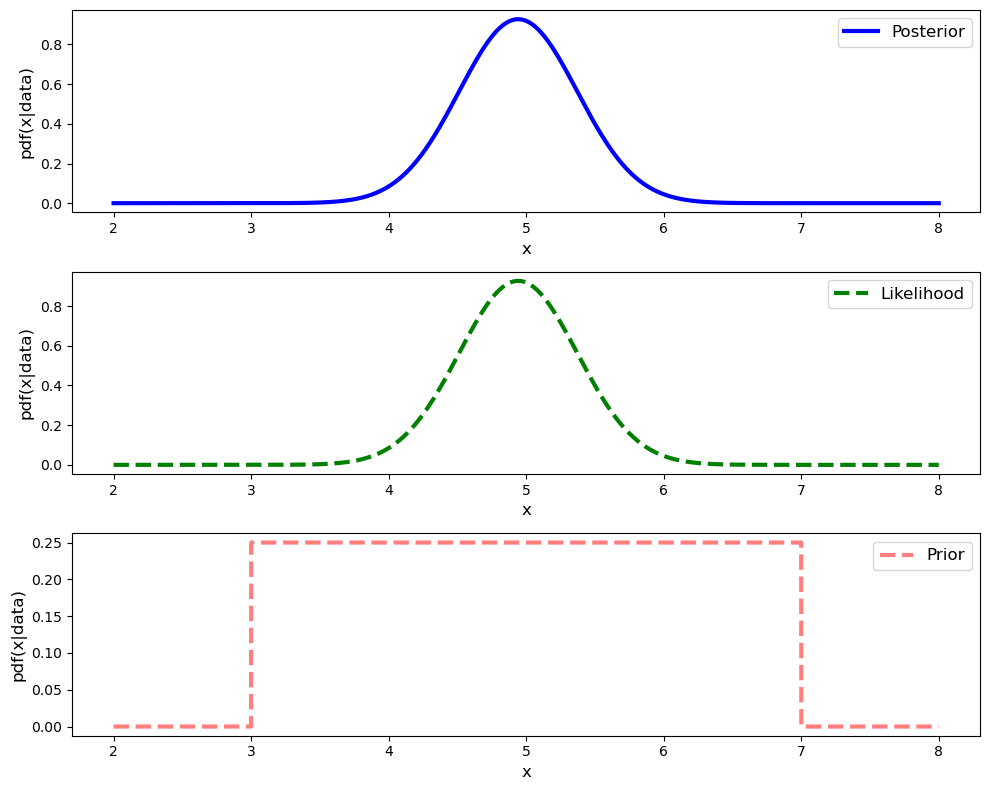

In [106]:
from scipy import stats
import matplotlib.pyplot as plt

# Define the range of the mean voltage values
min_v = 2
max_v = 8
num_v = 10000

# Define the range of the prior
prior_min = 3
prior_max = 7

# Create a grid of mean voltage values
voltage_grid = np.linspace(min_v, max_v, num_v)

# Create a uniform prior for the mean voltage in the range 3 to 7
prior = stats.uniform.pdf(voltage_grid, prior_min, prior_max - prior_min)

# Calculate the likelihood for each voltage in the grid
likelihoods = []
for voltage in voltage_grid:
    pdf = norm.pdf(meas, loc=voltage, scale=uncert)
    likelihoods.append(np.product(pdf))
likelihoods = np.array(likelihoods)

# Calculate the posterior probability density
posterior = likelihoods * prior

# Normalize the posterior
normalized_posterior = posterior / (np.sum(posterior) * (voltage_grid[1] - voltage_grid[0]))

# Plot the normalized posterior
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(voltage_grid, normalized_posterior, label='Posterior', c='blue', lw=3)
plt.xlabel('x', fontsize=12)
plt.ylabel('pdf(x|data)', fontsize=12)
plt.legend(fontsize=12)

# Plot the normalized likelihood
plt.subplot(3, 1, 2)
plt.plot(voltage_grid, likelihoods / (np.sum(likelihoods) * (voltage_grid[1] - voltage_grid[0])), label='Likelihood', c='green', ls='--', lw=3)
plt.xlabel('x', fontsize=12)
plt.ylabel('pdf(x|data)', fontsize=12)
plt.legend(fontsize=12)

# Plot the prior
plt.subplot(3, 1, 3)
plt.plot(voltage_grid, prior, label='Prior', c='red', alpha=0.5, ls='--', lw=3)
plt.xlabel('x', fontsize=12)
plt.ylabel('pdf(x|data)', fontsize=12)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

SRT: Nice!

Part 4

In [107]:
# Draw samples from the posterior
samples = np.random.choice(voltage_grid, size=10000, p=normalized_posterior/normalized_posterior.sum())

# Calculate the 16th and 84th percentiles of the samples
lower, upper = np.percentile(samples, [16, 84])

# Calculate the sample mean and standard error
sample_mean = np.mean(samples)

# Find the MAP value of the mean
map_index = np.argmax(normalized_posterior)
map_value = voltage_grid[map_index]

print(f"68.3% credible region: {lower} to {upper}")
print(f"Sample mean ± standard error: {sample_mean} ± {error}")
print(f"MAP value of the mean: {map_value}")

68.3% credible region: 4.517851785178518 to 5.365136513651366
Sample mean ± standard error: 4.943323252325233 ± 0.43024334605205083
MAP value of the mean: 4.942094209420942


Part 5

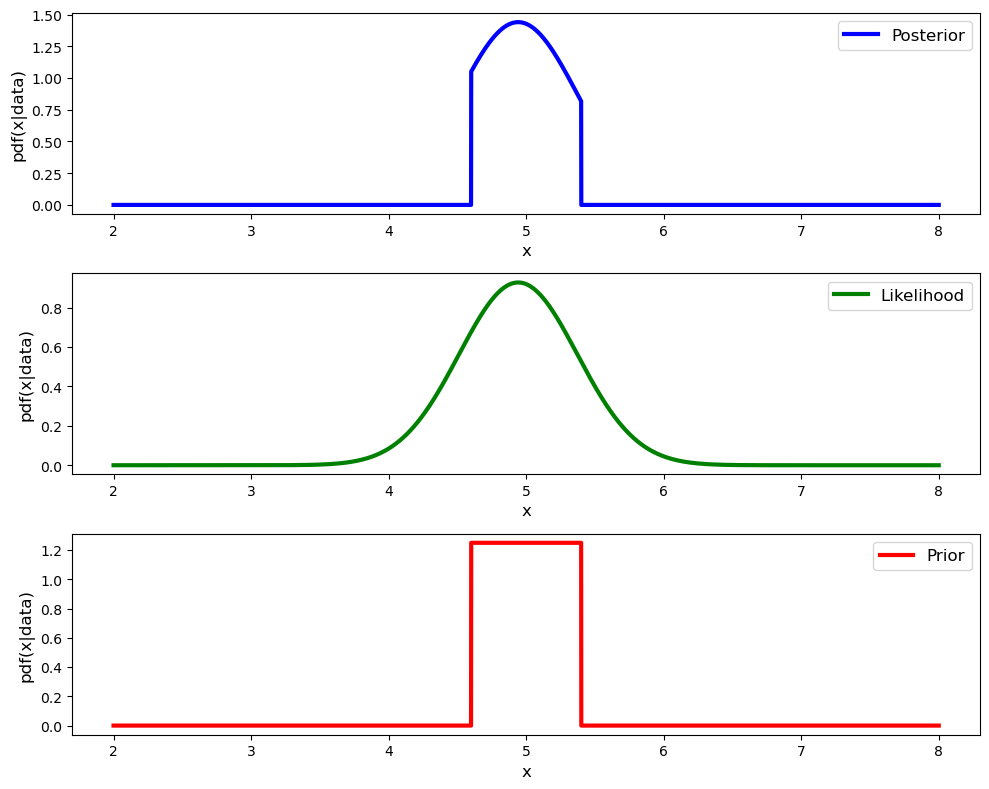

68.3% credible region: 4.72967296729673 to 5.234323432343235
Sample mean ± standard error: 4.982257485748575 ± 0.0021998884795131333
MAP value of the mean: 4.942094209420942


In [108]:
# Define the range of the new prior
NEW_PRIOR_MIN = 4.6
NEW_PRIOR_MAX = 5.4

# Create a new uniform prior for the mean voltage in the range 4.6 to 5.4
new_prior = stats.uniform.pdf(voltage_grid, NEW_PRIOR_MIN, NEW_PRIOR_MAX - NEW_PRIOR_MIN)

# Calculate the new posterior probability density
new_posterior = np.array(likelihoods) * new_prior

# Normalize the new posterior
normalized_new_posterior = new_posterior / (np.sum(new_posterior) * (voltage_grid[1] - voltage_grid[0]))

def plot_distribution(subplot, data, label, color):
    plt.subplot(3, 1, subplot)
    plt.plot(voltage_grid, data, label=label, c=color, lw=3)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('pdf(x|data)', fontsize=12)
    plt.legend(fontsize=12)

# Plot the normalized new posterior, normalized likelihood, and new prior distributions
plt.figure(figsize=(10, 8))
plot_distribution(1, normalized_new_posterior, 'Posterior', 'blue')
plot_distribution(2, np.array(likelihoods) / (np.sum(likelihoods) * (voltage_grid[1] - voltage_grid[0])), 'Likelihood', 'green')
plot_distribution(3, new_prior, 'Prior', 'red')

plt.tight_layout()
plt.show()

# Draw samples from the new posterior
new_samples = np.random.choice(voltage_grid, size=10000, p=normalized_new_posterior/normalized_new_posterior.sum())

# Calculate the 16th and 84th percentiles of the new samples
new_lower, new_upper = np.percentile(new_samples, [16, 84])

# Calculate the new sample mean and standard error
new_sample_mean = np.mean(new_samples)
new_standard_error = np.std(new_samples) / np.sqrt(len(new_samples))

# Find the new MAP value of the mean
new_map_index = np.argmax(normalized_new_posterior)
new_map_value = voltage_grid[new_map_index]

print(f"68.3% credible region: {new_lower} to {new_upper}")
print(f"Sample mean ± standard error: {new_sample_mean} ± {new_standard_error}")
print(f"MAP value of the mean: {new_map_value}")

Part 6

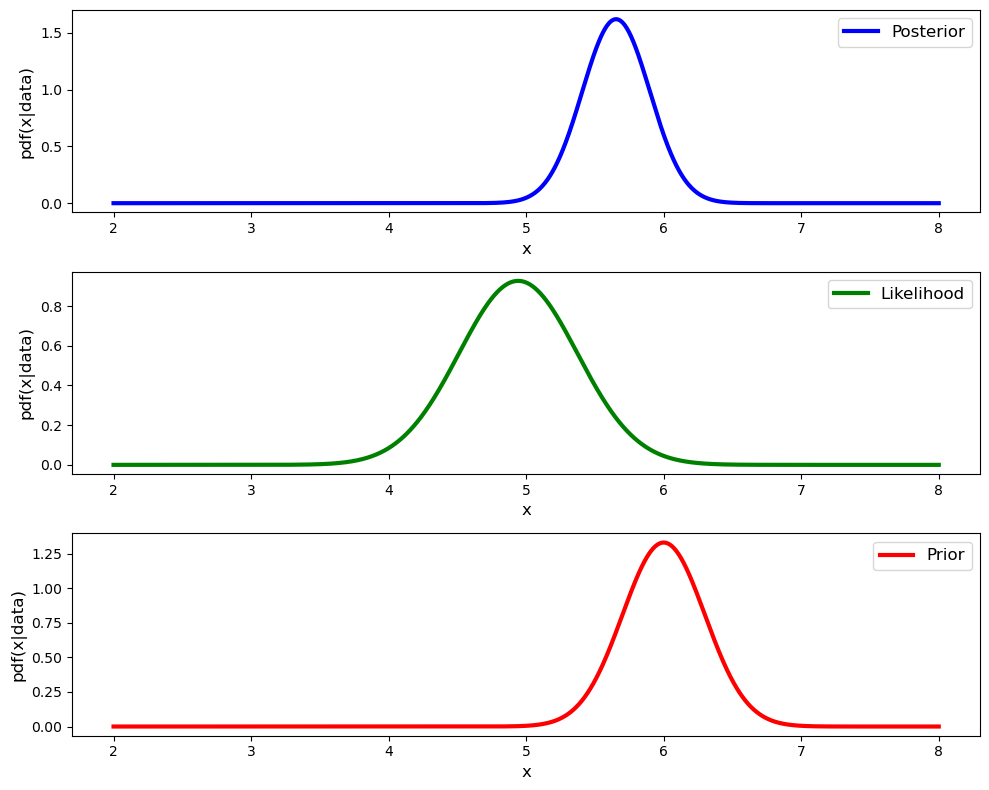

68.3% credible region: 5.405340534053406 to 5.899285928592859
Sample mean ± standard error: 5.652492769276927 ± 0.002468639991899396
MAP value of the mean: 5.653765376537654


In [109]:
# Define the parameters of the Gaussian prior
PRIOR_MEAN = 6
PRIOR_STD = 0.3

# Create a Gaussian prior for the mean voltage
gaussian_prior = stats.norm.pdf(voltage_grid, PRIOR_MEAN, PRIOR_STD)

# Calculate the new posterior probability density
gaussian_posterior = np.array(likelihoods) * gaussian_prior

# Normalize the new posterior
normalized_gaussian_posterior = gaussian_posterior / (np.sum(gaussian_posterior) * (voltage_grid[1] - voltage_grid[0]))

# Plot the normalized new posterior, normalized likelihood, and Gaussian prior distributions
plt.figure(figsize=(10, 8))
plot_distribution(1, normalized_gaussian_posterior, 'Posterior', 'blue')
plot_distribution(2, np.array(likelihoods) / (np.sum(likelihoods) * (voltage_grid[1] - voltage_grid[0])), 'Likelihood', 'green')
plot_distribution(3, gaussian_prior, 'Prior', 'red')
plt.tight_layout()
plt.show()

# Draw samples from the new posterior
gaussian_samples = np.random.choice(voltage_grid, size=10000, p=normalized_gaussian_posterior/normalized_gaussian_posterior.sum())

# Calculate the 16th and 84th percentiles of the new samples
gaussian_lower, gaussian_upper = np.percentile(gaussian_samples, [16, 84])

# Calculate the new sample mean and standard error
gaussian_sample_mean = np.mean(gaussian_samples)
gaussian_standard_error = np.std(gaussian_samples) / np.sqrt(len(gaussian_samples))

# Find the new MAP value of the mean
gaussian_map_index = np.argmax(normalized_gaussian_posterior)
gaussian_map_value = voltage_grid[gaussian_map_index]

print(f"68.3% credible region: {gaussian_lower} to {gaussian_upper}")
print(f"Sample mean ± standard error: {gaussian_sample_mean} ± {gaussian_standard_error}")
print(f"MAP value of the mean: {gaussian_map_value}")

Part 7

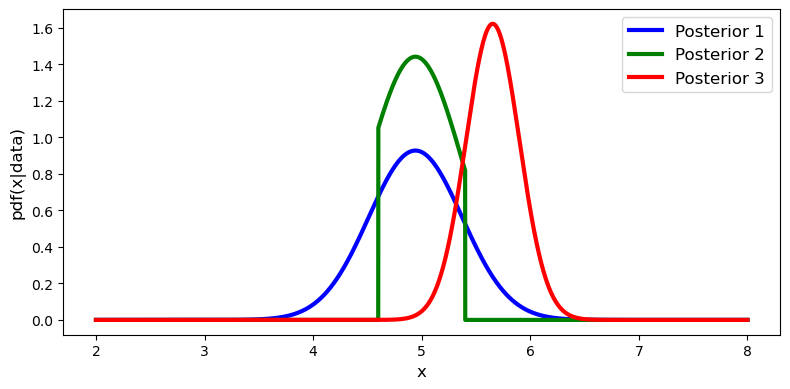

In [110]:
# Plot the normalized posterior, normalized likelihood, and prior distributions
plt.figure(figsize=(8, 4))

# Plot all the posteriors on top of each other
plt.plot(voltage_grid, normalized_posterior, label='Posterior 1', c='blue', lw=3)
plt.plot(voltage_grid, normalized_new_posterior, label='Posterior 2', c='green', lw=3)
plt.plot(voltage_grid, normalized_gaussian_posterior, label='Posterior 3', c='red', lw=3)
plt.xlabel('x', fontsize=12)
plt.ylabel('pdf(x|data)', fontsize=12)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

SRT: Outstanding, Kamara!

Part 8

In [111]:
# The likelihood at the best-fit value.
evidence_delta_prior = likelihoods[map_index]

# For the model with the uniform prior, we need to integrate the likelihood times the
# prior over all possible values of the mean.
evidence_uniform_prior = np.sum(likelihoods * prior) * (voltage_grid[1] - voltage_grid[0])

# The Bayes factor is the ratio of the evidence for the two models. 
bayes_factor = evidence_delta_prior/ evidence_uniform_prior

print('Evidence under uniform prior:',evidence_uniform_prior)
print('Evidence under delta prior:',evidence_delta_prior)

print(f"Bayes factor: {bayes_factor}")
print(f"Bayes factor is somewhat substantial evidence which is favoring the delta function prior based on the factor being ~ 3.7")

# The Occam penalty refers to the fact that more complex models (those with more parameters
# or wider priors) are penalized in Bayesian model comparison. In this case, the model with
# the uniform prior is more complex than the model with the delta function prior, because it
# allows for a wider range of values for the mean. Therefore, we would expect it to have a
# lower evidence, and thus a higher Occam penalty.

Evidence under uniform prior: 2.8918714355853864e-08
Evidence under delta prior: 1.072597133226963e-07
Bayes factor: 3.7090069773791403
Bayes factor is somewhat substantial evidence which is favoring the delta function prior based on the factor being ~ 3.7


SRT: Awesome!

## Problem 2

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_2.npy`, which is a (3 x 20) numpy array that you used in `Lecture_9`. Set `x, y, sigma_y = data`. 

We're going to do some polynomial fits to this data just like in `Lecture 9`. However, in all cases you should **keep the $y$-intercept fixed at $-0.23$**. 

2) Use the following code to compute the un-normalized posterior pdf (i.e. just the likelihood x prior) on a grid of the linear coefficient (i.e. the slope) of a linear model, with a uniform prior between 0.5 and 1.5. Plot this posterior pdf. Remember this is just a one-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100.

In [88]:
#Functions to do a polynomial fit, and compute the likelihood
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    # For a polynomial with order 1, this gives theta_0 + theta_1*x
    # For a polynomial with order 2, this gives theta_0 + theta_1*x + theta_2*x^2, etc.
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(scipy.stats.norm.logpdf(*args) 
               for args in zip(y, y_fit, sigma_y))

3) Using your 1D gridded likelihood-x-prior, compute the Bayesian evidence of this linear model. This may be a big number!

4) Now compute the joint 2D posterior pdf (again just the likelihood x prior) of linear and quadratic coefficients of a quadratic model. Give the linear coefficient a uniform prior between 0.5 and 1.5. Give the quadratic coefficient a uniform prior between -1 and 0.25. Plot this two-dimensional posterior. Remember this is a two-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100 in each model dimension.

5) Using your 2D gridded likelihood-x-prior, compute the Bayesian evidence of the quadratic model. 

6) Calculate the Bayes factor for a linear versus quadratic model. How does this compare/contrast with the BIC model comparison in the lecture? 

### Solution

Part 1

In [89]:
data2 = np.load("../../homeworks/hw_data/hw4_data_2.npy")

Part 2

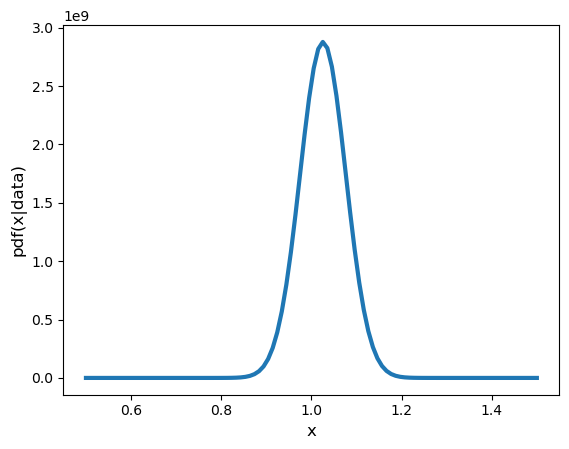

In [90]:
# Define the range of the slope and the grid
slope_range = np.linspace(0.5, 1.5, 100)

# Define a uniform prior for the slope
prior = np.full_like(slope_range, 1/(1.5 - 0.5))

# Initialize a list to store the log-likelihoods
log_likelihoods = []

# Compute the log-likelihood for each slope
for slope in slope_range:
    # Define the model parameters
    theta = np.array([-0.23, slope])
    
    # Compute the log-likelihood
    log_likelihood = logL(theta, data2, model=polynomial_fit)
    log_likelihoods.append(log_likelihood)

# Convert the log-likelihoods to a numpy array
log_likelihoods = np.array(log_likelihoods)

# Compute the un-normalized log-posterior
log_posterior = np.log(prior) + log_likelihoods

# Convert the log-posterior to a posterior
posterior = np.exp(log_posterior)

# Plot the posterior
plt.plot(slope_range, posterior,lw =3)
plt.xlabel('x', fontsize=12)
plt.ylabel('pdf(x|data)', fontsize=12)
plt.show()

part 3

In [91]:
# Compute the step size
step_size = slope_range[1] - slope_range[0]

# Compute the evidence
evidence1 = np.sum(posterior) * step_size

print("The Bayesian evidence for the linear model is:", evidence1)

The Bayesian evidence for the linear model is: 365684733.1606578


Part 4

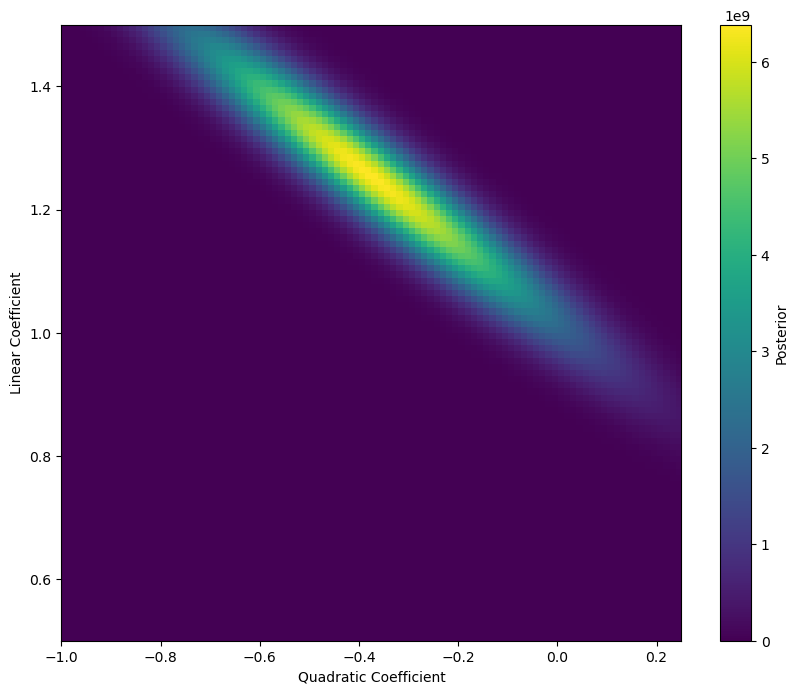

In [98]:

# Define the range and grid for the linear and quadratic coefficients

linear_range = np.linspace(0.5, 1.5, 100)
quadratic_range = np.linspace(-1, 0.25, 100)

# Define the uniform priors for the coefficients
linear_prior = 1 / (1.5 - 0.5)
quadratic_prior = 1 / (0.25 - (-1))

# Initialize a 2D array to store the posterior
posterior = np.empty((100, 100))
Llog = []
# Compute the posterior for each combination of coefficients
for i, linear in enumerate(linear_range):
    for j, quadratic in enumerate(quadratic_range):
        # Define the model parameters
        # y-intercept fixed at −0.23
        theta = np.array([-0.23, linear, quadratic])
        
        # Compute the log-likelihood
        log_likelihood = logL(theta, data2, model=polynomial_fit)
        Llog.append(log_likelihood)
        # Compute the un-normalized log-posterior
        log_posterior = np.log(linear_prior * quadratic_prior) + log_likelihood
        
        # Convert the log-posterior to a posterior
        posterior[i, j] = np.exp(log_posterior)

# Plot the posterior
plt.figure(figsize=(10,8))
plt.imshow(posterior, extent=[-1, 0.25, 0.5, 1.5], origin='lower', aspect='auto')
plt.xlabel('Quadratic Coefficient')
plt.ylabel('Linear Coefficient')
plt.colorbar(label='Posterior')
plt.show()

SRT: Nice!

part 5

In [82]:
# Compute the area of each grid cell
B2D = (linear_range[1] - linear_range[0]) * (quadratic_range[1] - quadratic_range[0])

# Compute the evidence
evidence2 = np.sum(posterior) * B2D

print("The Bayesian evidence for the quadratic model is:", evidence2)

The Bayesian evidence for the quadratic model is: 493061001.6570572


Part 6

In [101]:
# Calculate the Bayes factor
bayes_factor = evidence1/ evidence2

print("The Bayes factor for the quadratic model vs the linear model is:", bayes_factor)
print("Linear model for my code is more probable than Quadratic model based on the ratio being less than 1.")

print('\nBIC for linear model',-2*np.amax(log_likelihoods)+1*np.log(len(log_likelihoods)))
print('BIC for quadratic model',-2*np.amax(Llog)+2*np.log(len(Llog)))
print("The BIC The Bayesian Information Criterion (BIC) imposes a stricter penalty on model complexity, as compared to the Bayesian evidence.")


# The data are 1/0.7416622526050144 which = 1.35 times more likely to occur under the linear model than the quadratic model.


The Bayes factor for the quadratic model vs the linear model is: 0.7416622526050144
Linear model for my code is more probable than Quadratic model based on the ratio being less than 1.

BIC for linear model -38.95553992520727
BIC for quadratic model -27.179045185730892
The BIC The Bayesian Information Criterion (BIC) imposes a stricter penalty on model complexity, as compared to the Bayesian evidence.


SRT: Fantastic work, Kamara!